In [1]:
import numpy

In [2]:
threshold_file = "./data/thresholds_scores.csv"
with open(threshold_file, "rt") as f:
    thresholds_columns = {name.strip('"'): i for i, name in enumerate(next(f).rstrip().split(","))}
    print(list(thresholds_columns))
thresholds_scores = numpy.genfromtxt(threshold_file, delimiter=",")[1:]
print(thresholds_scores.shape)
thresholds_scores_by_columns = thresholds_scores.transpose()


['sorted_fuzzy', 'tokenization', 'fuzzy', 'partial_fuzzy', 'abbreviation', 'accuracy', 'precision', 'recall']
(161050, 8)


In [3]:
from typing import *

def print_top(result, k=3):
    for i, t in enumerate(("accuracy", "precision", "recall")):
        key = thresholds_columns[t]
        sorted_list = reversed(sorted(thresholds_scores, key=lambda x: x[key]))
        print(t, ":")
        for i, r in zip(range(k), sorted_list):
            values = list(zip(thresholds_columns, r))
            print("\t", dict(values[:-3]))
            print("\t", dict(values[-3:]))
            print()
        print()

In [4]:
print_top(thresholds_scores)

accuracy :
	 {'sorted_fuzzy': 0.8, 'tokenization': 0.3, 'fuzzy': 0.6, 'partial_fuzzy': 1.1, 'abbreviation': 0.2}
	 {'accuracy': 0.98334670614605, 'precision': 0.990227147050066, 'recall': 0.9383578209081564}

	 {'sorted_fuzzy': 0.7, 'tokenization': 0.3, 'fuzzy': 0.6, 'partial_fuzzy': 1.1, 'abbreviation': 0.2}
	 {'accuracy': 0.9833419724070352, 'precision': 0.9901748117902258, 'recall': 0.9383880524820122}

	 {'sorted_fuzzy': 0.9, 'tokenization': 0.3, 'fuzzy': 0.6, 'partial_fuzzy': 1.1, 'abbreviation': 0.2}
	 {'accuracy': 0.9833419724070352, 'precision': 0.9902269391922071, 'recall': 0.938337666525586}


precision :
	 {'sorted_fuzzy': 1.1, 'tokenization': 1.0, 'fuzzy': 1.1, 'partial_fuzzy': 1.1, 'abbreviation': 1.1}
	 {'accuracy': 0.775478758529606, 'precision': 1.0, 'recall': 0.04407763468166153}

	 {'sorted_fuzzy': 1.0, 'tokenization': 0.9, 'fuzzy': 1.0, 'partial_fuzzy': 1.1, 'abbreviation': 1.1}
	 {'accuracy': 0.7757107117413296, 'precision': 1.0, 'recall': 0.045065199427615533}

	 {

In [5]:
import matplotlib.pyplot as plt

In [6]:
def show_plot(x, y, figsize=(10, 10)):
    fig, ax = plt.subplots(figsize=figsize)
    
    ax.grid(True, alpha=0.3)
    ax.set_xlabel('precision')
    ax.set_ylabel('recall')


    scatter = ax.scatter(x, y) #, c=group)
    
    plt.show()


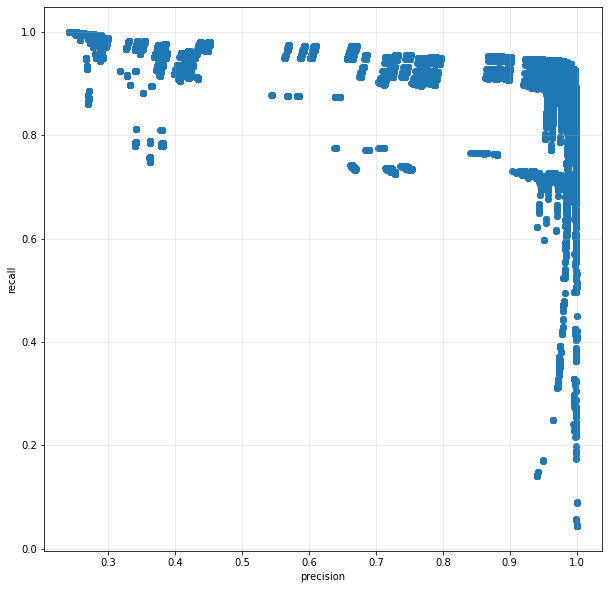

In [7]:
precision_column = thresholds_columns["precision"]
recall_column = thresholds_columns["recall"]
show_plot(thresholds_scores_by_columns[precision_column], thresholds_scores_by_columns[recall_column])

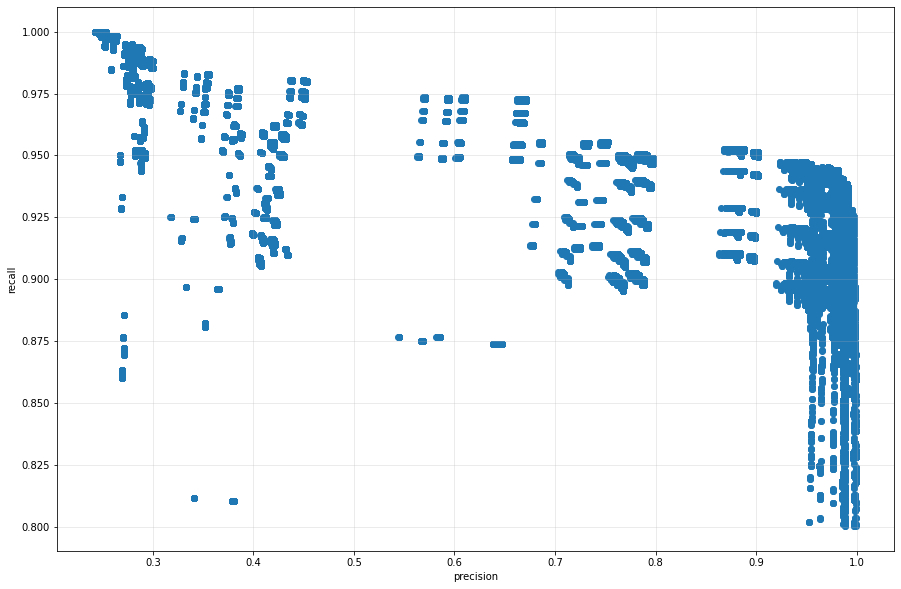

In [8]:
r = thresholds_scores[thresholds_scores_by_columns[recall_column] >= 0.8].transpose()
show_plot(r[precision_column], r[recall_column], figsize=(15, 10))

## Name agent

In [9]:
COMPANY_FILE = "./data/company_pairs_with_name_agent_scores.csv"
with open(COMPANY_FILE, "rt") as f:
    companies_columns = {name: i for i, name in enumerate(next(f).rstrip().split(",")[2:])}
companies_df = numpy.genfromtxt(COMPANY_FILE, delimiter=",")[1:].transpose()[2:]


In [10]:
results = []
for i in range(0, 100, 5):
    threshold = i / 100
    result = (companies_df[1] > threshold)
    
    tp = ((companies_df[0] == 1) & result).sum()
    tn = ((companies_df[0] == 0) & ~result).sum()

    fp = ((companies_df[0] == 0) & result).sum()
    fn = ((companies_df[0] == 1) & ~result).sum()

    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    results.append((threshold, accuracy, precision, recall))

In [11]:
print("accuracy, precision, recall")
for r in results:
    print(r[0], ":", *r[1:])

accuracy, precision, recall
0.0 : 0.8806790075242782 0.7239351601273313 0.795231473083822
0.05 : 0.9180968475665031 0.8479745008937609 0.7935586593304714
0.1 : 0.9357181910489729 0.9296982126462137 0.7857286817018361
0.15 : 0.9374247039637964 0.945115687521401 0.7788056512888728
0.2 : 0.9369134601502015 0.9471194125474348 0.7746538484793518
0.25 : 0.9366862406774927 0.947410004444225 0.7733639679948405
0.3 : 0.9375406805696581 0.95831183702231 0.767458733901687
0.35 : 0.9371406796229104 0.9625744691684913 0.7619968962250842
0.4 : 0.9365063585949316 0.9694867339263947 0.7533808976761996
0.45 : 0.9345158213392221 0.9868437164120216 0.7309389926839591
0.5 : 0.926466098144611 0.9922728060546536 0.6923131184876151
0.55 : 0.9240542581165873 0.9943167596696064 0.680542959066449
0.6 : 0.9178530600072426 0.9952871463440843 0.6533446197875729
0.65 : 0.9091098440469682 0.9964581259079113 0.6152125279642058
0.7 : 0.889443525310119 0.999049863180298 0.5297982546304694
0.75 : 0.8736399376093198 0.99

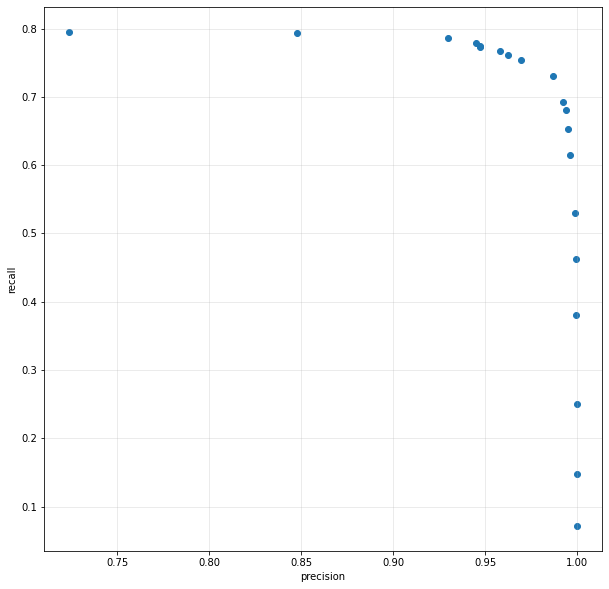

In [12]:
show_plot([r[2] for r in results],[r[3] for r in results])